# Assignment 3 (Oct 05)

Today's topics will include:

1. Python `tuples` (`()`) and "unpacking" with `*` operator
2. Curve fitting with `scipy.optimize.curve_fit()`
3. Chi-Squared ($\chi^2$) and Reduced Chi-Squared ($\chi^2_\nu$)
4. Covariance matrix, getting uncertainty for your fitting results

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following resources while working on your assignment:

- [SPIRL Ch. 3.3.10. Tuples](https://cjtu.github.io/spirl/python_basic-types.html#tuples)


## Python tuples `()`

Previously, we learned about lists (made with square brackets, `[]`) and dictionaries (using curly braces, `{}`). Today we will learn about tuples (which use parentheses, `()`)!

We can think of the `tuple` as a "locked" version of its cousin the `list` (`[]`). This means that once a `tuple` is made, you cannot modify it anymore!

Below we can see what happens if we try to change a `list` element vs. trying to change a `tuple` element:

In [2]:
# Review: we can modify lists...
color_list = ['green', 'blue', 'purple', 'yellow', 'black']
print('Before: ', color_list)

# Now if we modify the 1st element:
color_list[0] = 'periwinkle'
print('After: ', color_list)

Before:  ['green', 'blue', 'purple', 'yellow', 'black']
After:  ['periwinkle', 'blue', 'purple', 'yellow', 'black']


In [3]:
# But what if we want to change the first element in a tuple?
color_tuple = ('green', 'blue', 'purple', 'yellow', 'black')
color_tuple[0] = 'periwinkle'

TypeError: 'tuple' object does not support item assignment

Unlike the `list`, we cannot change elements once a `tuple` is made.

But, like the `list`, we can access elements by their indices or with the `slice` (`[a:b]`) notation:

In [5]:
# We can access tuple values similarly to lists with indexing and slicing
print(color_tuple[3])
print(color_tuple[0:2])

yellow
('green', 'blue')


You may recall we have met the `tuple` before! 

In week 2 we explored the `zip` function when using a shortcut to make a dictionary (`dict`, `{}`) object. When we printed the `zip` as a `list`, it had several `tuple` objects inside (which we now know are shown with parentheses `()`):

In [6]:
planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
planet_g = [3.61, 8.83, 9.80665, 3.75, 26.0, 11.2, 10.5, 13.3]

zipped_list = list(zip(planets, planet_g))
print(zipped_list)

[('mercury', 3.61), ('venus', 8.83), ('earth', 9.80665), ('mars', 3.75), ('jupiter', 26.0), ('saturn', 11.2), ('uranus', 10.5), ('neptune', 13.3)]


In [8]:
# The outer list is type "list"
print("Type of full list is:", type(zipped_list))
print("1st element is:", zipped_list[0])
print(f'Type of 1st element is: {type(zipped_list[0])}')

Type of full list is: <class 'list'>
1st element is: ('mercury', 3.61)
Type of 1st element is: <class 'tuple'>


## Unpacking a `tuple`, `list`, or NumPy `array`

We can "unpack" a *list-like* object (`tuple`, `list`, NumPy `array`, etc.) into several individual variables by setting several variables separated by commas equal (`=`) to that list-like object. 

Be sure to give same number of variables as there are elements in the list!

In [9]:
color_tuple = ('green', 'blue', 'purple', 'yellow', 'black')
print('Whole tuple: ', color_tuple)

a, b, c, d, e = color_tuple
print('Individual value extracted are:', a, b, c, d, e)

Whole tuple:  ('green', 'blue', 'purple', 'yellow', 'black')
Individual value extracted are: green blue purple yellow black


### Unpacking using the **asterisk** (`*`)

In the example above, Python knew to unpack each `string` into its own variable because of the pattern we used (variables, equal sign, list). If we want to explicitly tell Python to unpack a list-like object we can use the `*` operator in front of that object.

In [10]:
color_list = ['green', 'blue', 'purple', 'yellow', 'black']
print('Whole list: ', color_list)
print('Unpacked:', *color_list)

Whole list:  ['green', 'blue', 'purple', 'yellow', 'black']
Unpacked: green blue purple yellow black


We often want to use this trick when giving multiple arguments to functions:

In [11]:
# This function takes 5 arguments
def multiply_all(a, b, c, d, e):
    """Return the product of elements a through e"""
    return a * b * c * d * e

print(multiply_all(1, 2, 3, 4, 5))

# What if we want to pass a list of numbers to multiply?
our_list = [1, 2, 3, 4, 5]
print(multiply_all(our_list))

120


TypeError: multiply_all() missing 4 required positional arguments: 'b', 'c', 'd', and 'e'

Python is telling us we are not giving the function the correct number of arguments. This is because `our_list` is a single object, and Python assumes it to be the first argument, `a` (which is why the error says arguments 'b', 'c', 'd', and 'e' are missing).

We could pass in each argument of the list individually, but this can get messy quickly...

In [12]:
print(multiply_all(our_list[0], our_list[1], our_list[2], our_list[3], our_list[4]))

120


Instead, we can tell Python to **unpack** our list into its 5 elements using `*` and then it recognizes the 5 different arguments to `multiply_all`.

In [13]:
print(multiply_all(*our_list))

120


We can also use the `*` as a stand-in for multiple arguments in the multiple variable assignment example we saw before:

In [14]:
color_tuple = ('green', 'blue', 'purple', 'yellow', 'black')

# Here, any remaining arguments are unpacked into others
a, b, *others = color_tuple
print(a, b, others)

# Here, some arguments in the middle can be unpacked into middle_others
a, b, *middle_others, e = color_tuple
print(a, b, middle_others, e)

# In Python, we use underscore to indicate that we don't care about a value(s)
a, b, *_ = color_tuple
print(a, b)

green blue ['purple', 'yellow', 'black']
green blue ['purple', 'yellow'] black
green blue


## Curve fitting with `scipy.optimize.curve_fit()`

Last week's assignment we were trying to fit the free-fall function

$$H = \frac{1}{2} g t^2$$

using the `np.polyfit`. But polyfit can only fit polynomials of the form

$$y = a x^2 + b x + c$$

Which has a couple extra terms that we don't need.

Today we will learn to define custom functions with any number of parameters  that we can fit a curve to. We will do our curve-fitting using the [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html) package (`scipy.optimize.curve_fit`). We will also discuss how to quantify the "goodness of fit" with the *reduced chi-squared* statistic.

In [15]:
# same data given in assignment 2
import numpy as np
import matplotlib.pyplot as plt
time_steps = np.array([20.0, 27.966, 35.931, 43.897, 51.862, 59.828, 67.793, 75.759, 83.724, 91.69, 99.655, 107.621, 115.586, 123.552, 131.517, 139.483, 147.448, 155.414, 163.379, 171.345, 179.31, 187.276, 195.241, 203.207, 211.172, 219.138, 227.103, 235.069, 243.034, 251.0])
fall_distance = np.array([2798.322, 4543.523, 5459.432, 11554.559, 15958.431, 20023.776, 19146.256, 22765.371, 47183.159, 47167.289, 22978.494, 66253.599, 63625.642, 91050.12, 116941.625, 143460.073, 106462.323, 142584.887, 199564.683, 83593.839, 158030.907, 205442.175, 206733.665, 241555.039, 236078.303, 240508.665, 311193.102, 298704.903, 339502.307, 438338.605])
fall_distance_err = np.array([448.0, 875.919, 1445.964, 2158.136, 3012.435, 4008.861, 5147.413, 6428.093, 7850.899, 9415.832, 18538.153, 21620.131, 24938.986, 28494.72, 32287.332, 36316.821, 40583.189, 45086.435, 49826.558, 54803.56, 18005.232, 19640.459, 21346.75, 23124.104, 24972.521, 26892.002, 28882.547, 30944.154, 33076.825, 35280.56])

The first thing we need to do is define the function we would like to fit our data to. In this case it's the free-fall function.

**Note:** the independent variable (usually the "x" data on a plot) must be the first argument in your function for Scipy `curve_fit()` to work. Here, our independent variable is time.

In [16]:
# Note that time must be the first argument
def free_fall_h(time, g):
    """Free fall distance given time t on Earth.

    Args:
        t (float or np.array): Time in [s]

    Returns:
        [float or np.array]: Free fall distance in [m]
    """
    
    return 0.5 * g * time**2

Now we perform the fit using `scipy.optimize.curve_fit()`.

Input parameters for `curve_fit` are below (remember you can use `help(function_name))` to see this info):

```python
curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, 
          check_finite=True, bounds=(-inf, inf), method=None, jac=None, 
          **kwargs)
```

In [17]:
# We will import curve_fit from scipy.optimize
from scipy.optimize import curve_fit
popt, pcov = curve_fit(free_fall_h,  # f, function you defined for fitting
                       time_steps,  # xdata
                       fall_distance,  # ydata
                       sigma=fall_distance_err,  # uncertainty
                       absolute_sigma=True  # See below
                       )

One extra parameter we had to set was `absolute_sigma`, which means that the uncertainty (`sigma`) we pass in is the standard deviation of the data in the same units (not some relative measure of error, like 1/ydata).

We get two outputs from `curve_fit` (excerpt from `help(curve_fit)`): 


```python
Returns
-------
popt : array
    Optimal values for the parameters so that the sum of the squared
    residuals of ``f(xdata, *popt) - ydata`` is minimized
pcov : 2d array
    The estimated covariance of popt. The diagonals provide the variance
    of the parameter estimate. To compute one standard deviation errors
    on the parameters use ``perr = np.sqrt(np.diag(pcov))``.
```

So, `popt` are the best fit parameters we can pass back into our function like so:

In [18]:
time = np.linspace(0, 251, 1000)
y = free_fall_h(time, *popt)

We will talk about `pcov` in the following section. But now we have all we need to plot our original data (`ax.errorbar`), and the fit, `y`. 

Text(0.03, 0.83, '\nBest fit g is abbout 11.21 m/s^2\nSo the data is most likely taken from Saturn\n')

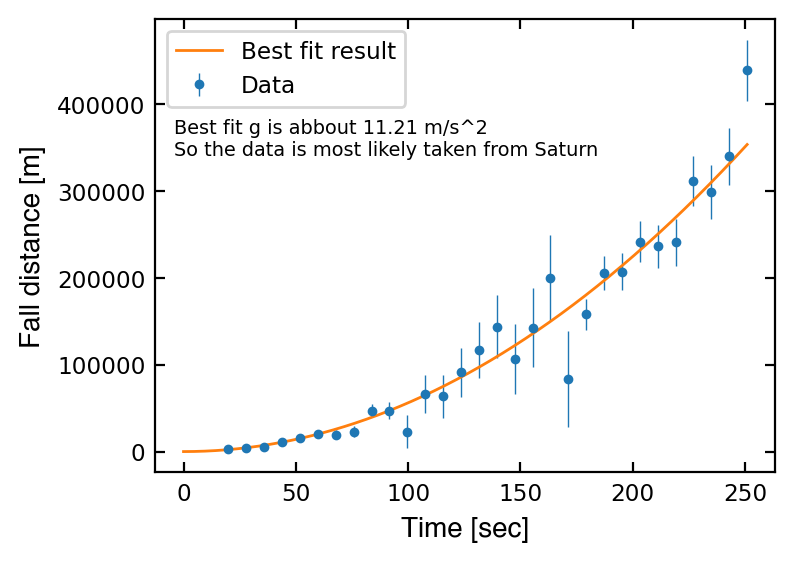

In [19]:
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200)
ax = plt.subplot(111)

ax.errorbar(time_steps, fall_distance, yerr=fall_distance_err, fmt = '.', 
             ms=5, lw=0.5, label='Data')

time = np.linspace(0, 251, 1000)
y = free_fall_h(time, *popt)
ax.plot(time, y, '-', lw=1, label='Best fit result')

ax.tick_params(axis='both', which ='both', labelsize='small', right=True, top=True, direction='in')   
ax.set_xlabel('Time [sec]', size='medium', fontname='Helvetica')
ax.set_ylabel('Fall distance [m]', size='medium', fontname='Helvetica')
ax.legend(fontsize='small')

msg = f'''
Best fit g is abbout {popt[0]:1.2f} m/s^2
So the data is most likely taken from Saturn
'''
ax.text(0.03, 0.83, msg, transform=ax.transAxes, size='x-small', va='top')

## Exponential fitting

Now let's try fitting a function of two parameters. The following function gives the intensity of light after travelling some distance through a medium:

$$I = I_0 e^{-\alpha x}$$

where $x$ is the distance the light travels, $\alpha$ is the attenuation coefficient, $I_0$ is the initial light intensity, and $I$ is the final light intensity.

Below are some measurements of intensity (`I`) and errors (`I_err`) of light travelling some distance (`dist`).

In [20]:
dist = np.array([12.0, 13.7959, 15.5918, 17.3878, 19.1837, 20.9796, 22.7755, 24.5714, 26.3673, 28.1633, 29.9592, 31.7551, 33.551, 35.3469, 37.1429, 38.9388, 40.7347, 42.5306, 44.3265, 46.1224, 47.9184, 49.7143, 51.5102, 53.3061, 55.102, 56.898, 58.6939, 60.4898, 62.2857, 64.0816, 65.8776, 67.6735, 69.4694, 71.2653, 73.0612, 74.8571, 76.6531, 78.449, 80.2449, 82.0408, 83.8367, 85.6327, 87.4286, 89.2245, 91.0204, 92.8163, 94.6122, 96.4082, 98.2041, 100.0])
I = np.array([482.214, 389.795, 417.421, 378.402, 393.997, 371.42, 285.195, 347.59, 304.29, 322.799, 300.704, 295.73, 271.516, 239.407, 229.565, 239.357, 191.643, 226.5, 184.056, 176.801, 181.224, 166.537, 164.609, 179.143, 142.931, 159.787, 134.377, 109.336, 167.306, 123.342, 126.411, 81.928, 103.654, 97.031, 109.793, 118.463, 78.641, 50.353, 82.108, 71.716, 89.883, 80.013, 57.005, 67.241, 95.849, 83.303, 41.501, 49.54, 73.028, 73.103])
I_err = np.array([37.723, -35.181, 11.103, -10.076, 22.576, 16.306, -54.328, 22.974, -6.074, 26.061, 16.994, 24.477, 12.172, -8.55, -7.505, 12.695, -25.067, 19.304, -14.043, -12.6, 0.138, -6.598, -0.925, 20.877, -8.387, 15.113, -3.945, -22.913, 40.863, 2.451, 10.828, -28.581, -2.003, -3.987, 13.211, 26.121, -9.647, -34.059, 1.402, -5.446, 16.108, 9.478, -10.434, 2.763, 34.203, 24.363, -14.852, -4.338, 21.516, 23.852])

As we should always do with new data, let's make a plot to see what we're dealing with:

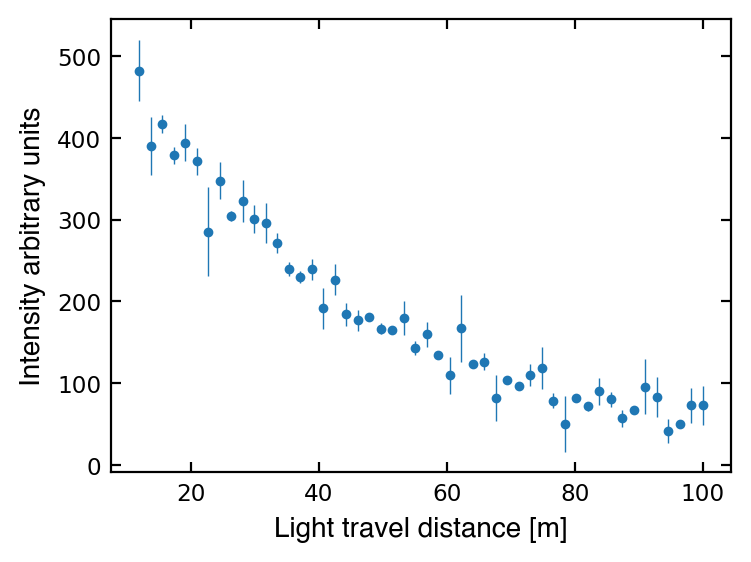

In [21]:
# Init plot
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200)
ax = plt.subplot(111)

# We can plot data and errors with ax.errorbar
ax.errorbar(dist, I, yerr=I_err, fmt='.', ms=5, lw=0.5)    

ax.tick_params(which='both', labelsize='small', right=True, top=True, direction='in')   
ax.set_xlabel('Light travel distance [m]', size='medium', fontname='Helvetica')
ax.set_ylabel('Intensity arbitrary units', size='medium', fontname='Helvetica')
plt.show()

Now let's define our attenuation function that we want to use in `curve_fit()`.

In [22]:
# Remember, x is the first argument, any other parameters follow in any order
def attenuation(x, I0, alpha):
    """
    Return intensity of light initially I0 after moving x distance through a 
    medium with attenuation coefficient alpha.

    Args:
        x (float or np.array): Distance travelled in [m]
        I0 (float): Initial intensity
        alpha (float): Attenuation coefficient

    Returns:
        float or np.array: Final intensity
    """
    return I0 * np.exp(-alpha * x)

Now we can fit plot our data!

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


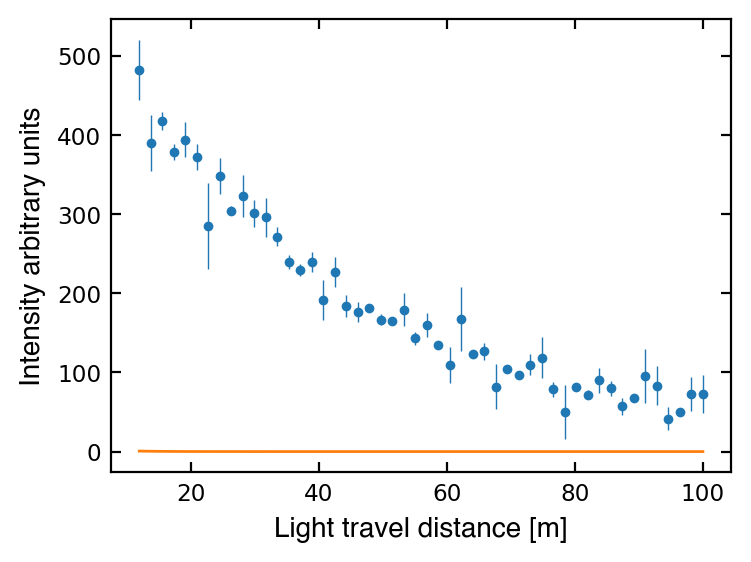

In [23]:
# Do the fitting
popt, pcov = curve_fit(attenuation, dist, I, sigma=I_err, absolute_sigma=True)

# Plot data and fit
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200 )
ax1 = plt.subplot(111)

ax1.errorbar(dist, I, yerr=I_err, fmt='.', ms=5, lw=0.5)
ax1.plot(dist, attenuation(dist, *popt), '-', lw=1)
      
ax1.tick_params(which='both', labelsize='small', right=True, top=True, direction='in')   
ax1.set_xlabel('Light travel distance [m]', size='medium', fontname='Helvetica')
ax1.set_ylabel('Intensity arbitrary units', size='medium', fontname='Helvetica')

plt.show()

Hmmm, something must be wrong... Let's check the documentation again:

```python
Parameters
----------
...

p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 (if the number of parameters for the
    function can be determined using introspection, otherwise a
    ValueError is raised).
```

It seems that if you do not provide an initial guess of each parameter using `p0`, they all default to `1`. If the guesses are too far off, then `curve_fit` may find the wrong parameters or not converge at all.

Let's try again, this time providing an initial guess as `p0`. This sometimes takes a little guess-work, but thinking about what parameter values are reasonable for your specific model can be helpful (and will be more important in the coming weeks!).

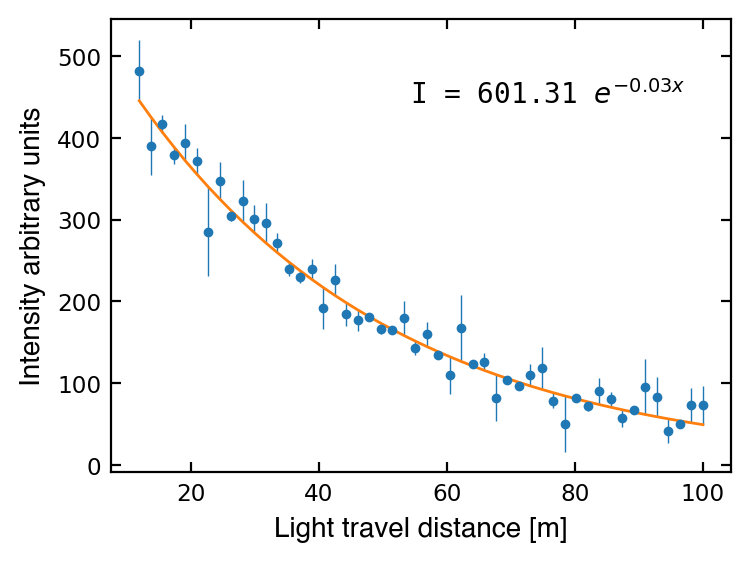

In [24]:
# Initial guess
p0 = [500, 0.05]
popt, pcov = curve_fit(attenuation, dist, I, p0=p0, sigma=I_err, absolute_sigma=True)

# Plot data and fit
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200 )
ax = plt.subplot(111)

ax.errorbar(dist, I, yerr=I_err, fmt='.', ms=5, lw=0.5)
ax.plot(dist, attenuation(dist, *popt), '-', lw=1)
      
ax.tick_params(which='both', labelsize='small', right=True, top=True, direction='in')   
ax.set_xlabel('Light travel distance [m]', size='medium', fontname='Helvetica')
ax.set_ylabel('Intensity arbitrary units', size='medium', fontname='Helvetica')

# Print equation
msg = f'I = {popt[0]:1.2f} $e^{{-{popt[1]:1.2f} x}}$'
ax.text(0.5, 0.9, msg, transform=ax1.transAxes, va='top', family='monospace')
plt.show()

## Chi-Squared ($\chi^2$) and Reduced Chi-Squared ($\chi^2_\nu$)

After the fitting, how can we tell if we have a good fit? Well, we can get some help with a "goodness of fit" metric call **Reduced Chi-Squared ($\chi^2_\nu$)** which is defined as:

$$\chi^2_\nu = \frac{\chi^2}{\nu}$$

where $\chi^2$ is calculated by the below equation, $\nu$ is the number of data points minus the degrees of freedom (number of model parameters).


The Chi-Squared ($\chi^2$) is given by

$$\chi^2 = \sum_i \frac{(D_i - M_i)^2}{\sigma_i^2}$$

where $D_i$ is the observed data, $M_i$ is the model fitted result, and $\sigma_i$ is the observed data uncertainty.

The final $\chi^2_\nu$ value will be a single number that we can interpret with the following simple rules of thumb: 

- $\chi^2_\nu \gg 1$: Fit is poor. The chosen model is unlikely to fit the data.
- $\chi^2_\nu > 1$: Fit does not fully capture the data. It's possible there are too few data points or the uncertainties are underestimated.
- $\chi^2_\nu < 1$: Fit is too good (overfitting). The model fits noise in the data or the uncertainties are overestimated (can be caused by having too many free parameters in fitting).

In general $\chi^2_\nu \approx 1$ means that the fit is doing a good job without overfitting. While these guidelines don't replace full statistical tests, they can be quick check of goodness of fit.

Below we define a reduced chi-squared function to test our fit:

In [25]:
def chi_squared_reduced(data, model, sigma, dof=None):
    """
    Calculate the reduced chi-squared value for a fit.

    If no dof is given, returns the chi-squared (non-reduced) value.

    Parameters
    ----------
    data : array_like
        The observed data.
    model : array_like
        The model data.
    sigma : array_like
        The uncertainty in the data.
    dof : int
        Degrees of freedom (len(data) - # of free parameters).
    """
    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual / sigma**2)
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        return chi_sq / nu

# Define our data, model, uncertainty, and degrees of freedom
I_data = I.copy()  # observed data
I_modeled = attenuation(dist, *popt) # model fitted result
I_sigma = I_err.copy() # uncertainty in the data

# Calculate the Chi-Squared value (no dof)
chisq = chi_squared_reduced(I_data, I_modeled, I_sigma)
print(f"chi-squared statistic = {chisq:1.2f}")

# Calculate the Reduced Chi-Squared value (with dof)
dof = 2  # We have two free parameters
rechisq = chi_squared_reduced(I_data, I_modeled, I_sigma, dof)
print(f"reduced chi-squared = {rechisq:1.2f}")

chi-squared statistic = 49.31
reduced chi-squared = 1.03


## Fit uncertainties and the covariance matrix

Recall we had two outputs of the `curve_fit` function, `popt` and `pcov`.

In the docstring of `curve_fit` we see:
```python
Returns
-------
...
pcov : 2d array
    The estimated covariance of popt. The diagonals provide the variance
    of the parameter estimate. To compute one standard deviation errors
    on the parameters use ``perr = np.sqrt(np.diag(pcov))``.
```

Here we learn the standard deviation errors of each fitted parameter is `np.sqrt(np.diag(pcov))`. To understand why, we'll do a quick rundown on the **Covariance matrix**:

The Covariance matrix with only two parameters looks like:

$$
\begin{pmatrix}
var(x) & cov(x,y)\\
cov(x,y) & var(y)
\end{pmatrix}
$$

where *var* is **variance** ($\sigma^2$), a measure of the dispersion of a set of data points from the mean. The **standard deviation** ($\sigma$) is defined as the square root of the **variance**. 

The `curve_fit()` function recommends using 2 steps to get the parameter errors, `perr`:
- first use the `np.diag()` function to extract the diagonal **variance** terms of the covariance matrix, `pcov`.
- then use `np.sqrt()` to convert the variance terms to standard deviation

Now we have uncertainties (standard deviations) for each fitted parameter we compute with Scipy's `curve_fit()` function!

We break down each step below:

In [26]:
# We can define a 2D array ("matrix") as a list of lists
matrix = np.array([[1, 2], 
                   [3, 4]])
print('Whole matrix: \n', matrix)

print('Only the diagonal terms: \n', np.diag(matrix))

Whole matrix: 
 [[1 2]
 [3 4]]
Only the diagonal terms: 
 [1 4]


In [27]:
# Now working on our data
print('Show the covariance matrix: \n', pcov)

# Sqrt of the diagonals (variance) of the covariance matrix
perr = np.sqrt(np.diag(pcov))
print('Show the standard deviation: \n', perr)

# Unpack and print
I0_err, alpha_err = perr
print(f'I_0 uncertainty: {I0_err:.4f}')
print(f'Alpha uncertainty: {alpha_err:.4f}')

Show the covariance matrix: 
 [[6.03733898e+01 2.08383436e-03]
 [2.08383436e-03 7.21680390e-08]]
Show the standard deviation: 
 [7.77003152e+00 2.68641097e-04]
I_0 uncertainty: 7.7700
Alpha uncertainty: 0.0003


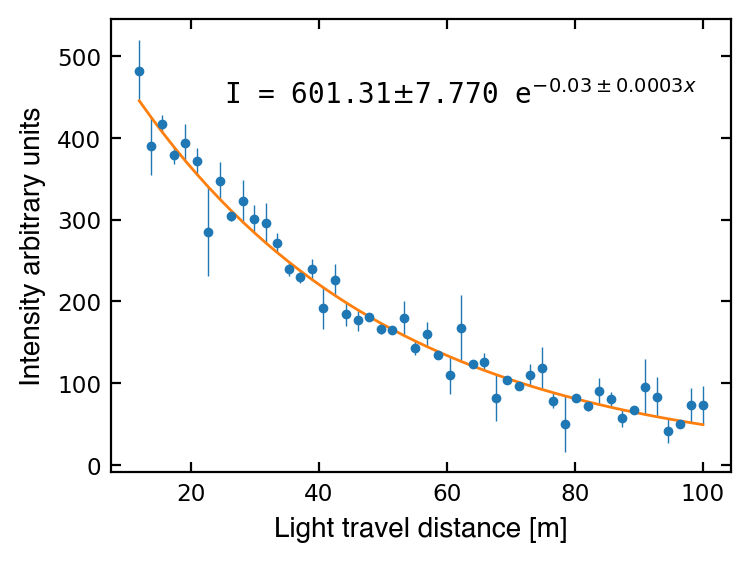

In [31]:
p0 = [500, 0.05]
popt, pcov = curve_fit(attenuation, dist, I, p0=p0, sigma=I_err, absolute_sigma=True)

# Compute fit errors and unpack
I0_err, alpha_err = np.sqrt(np.diag(pcov))
I0, alpha = popt  # we'll unpack our fit params too for later

# Make best-fitting curve to plot
x_fit = np.linspace(dist[0], dist[-1], 1000)
y_fit = attenuation(x_fit, I0, alpha)
# ---------

f = plt.figure(facecolor='white', figsize=(4,3), dpi=200 )
ax = plt.subplot(111)

ax.errorbar(dist, I, yerr=I_err, fmt='.', ms=5, lw=0.5)
ax.plot(dist, attenuation(dist, *popt), '-', lw=1)
      
ax.tick_params(which='both', labelsize='small', right=True, top=True, direction='in')   
ax.set_xlabel('Light travel distance [m]', size='medium', fontname='Helvetica')
ax.set_ylabel('Intensity arbitrary units', size='medium', fontname='Helvetica')

# Print fit equation and parameter errors
params = (I0, I0_err, alpha, alpha_err)
msg = 'I = {:1.2f}$\pm${:1.3f} e$^{{-{:1.2f}\pm{:1.4f} x}}$'.format(*params)
ax.text(0.2, 0.9, msg, transform=ax1.transAxes, va='top', family='monospace')
plt.show()

## [Assignment] Gaussian curve fitting

A common way to calculate the radial velocity (**RV**) of a stellar object is to do a cross-correlation (CC) between the target spectrum and a template. This tells us the amount of blueshift or redshift of the target, and therefore the radial velocity.

To compute the **RV** of a star from this cross-correlated spectrum, we often use the *Gaussian curve fitting* technique. To do so, we can fit a Gaussian to the data where:

- The **mean** of the Gaussian is the **RV** we want
- The **$\sigma$** of the Gaussian is the **RV Uncertainty**

Below are 50 data points showing the cross-correlation result of your target. 

1. Define a Gaussian function (see the equation of a Gaussian below)
2. Pass your function and the data to `scipy.optimize.curve_fit()` to fit the data
3. Make a plot of the data and the best-fit curve
4. Report the **RV** and **RV uncertainty**
5. Compute the parameter errors for your fit using the covariance matrix
6. Perform a reduced chi-squared test and comment on whether the Gaussian was a good fit to the data or not

The equation of a Gaussian function is:

$$y = a \exp\left({-\frac{(x-\mu)^2}{2\sigma^2}}\right)$$

where $a$ is a scaling factor we'll call "amplitude", $\mu$ is the mean, and $\sigma$ is the standard deviation.

> Note: We don't always have well-defined errors for our x and y which can make computing our goodness of fit challenging (e.g., here, we usually can't get errors for CC values...). However, for the sake of practice, we have given the CC errors so you have everything you need to do the 6 steps above!

In [34]:
velocity = np.array([37.535, 52.845, 53.918, 30.931, 5.6, 39.144, 22.699, 19.801, 17.425, 39.381, 73.684, 9.484, 45.404, 46.831, 55.452, 20.019, 44.051, 18.543, 79.721, 31.844, 64.963, 75.49, 39.81, 9.999, 28.751, 45.333, 23.268, 78.313, 76.148, 62.0, 47.152, 60.666, 34.733, 15.867, 12.259, 17.917, 76.266, 64.811, 55.157, 56.686, 73.041, 40.553, 53.292, 55.885, 32.44, 41.581, 67.152, 48.553, 15.797, 61.86])
cc = np.array([19.169, -2.234, 0.897, 45.039, 17.204, 17.93, 55.546, 44.068, 39.233, 13.922, -0.699, 11.723, 1.399, 8.346, -4.435, 39.067, 4.272, 35.141, 1.099, 33.662, 9.232, -2.758, 5.609, 14.435, 52.204, 8.086, 38.945, -7.799, 3.969, 6.933, 2.702, -3.327, 22.832, 32.447, 23.415, 34.154, -5.133, -7.918, 4.573, -8.673, -5.608, 20.915, -4.282, 0.947, 44.091, 4.933, -1.385, 2.817, 28.38, 4.481])
cc_err = np.array([-0.0371, -2.9829, 0.3501, 7.2887, 8.3716, 2.6817, 7.9506, 0.1183, 0.5635, -0.7848, -0.6988, -5.0142, -3.4584, 4.8028, -4.7763, -5.2763, -2.158, -6.2191, 1.0985, -1.6264, 9.2215, -2.7585, -8.1463, -3.577, 9.327, 3.1537, -8.927, -7.7991, 3.9685, 6.8977, -0.5885, -3.385, -4.1511, -2.0367, -0.6787, -5.7387, -5.1329, -7.93, 4.1986, -8.9031, -5.6084, 8.7182, -4.9393, 0.6498, 10.4736, -5.3009, -1.3893, 0.4611, -5.9066, 4.4444])

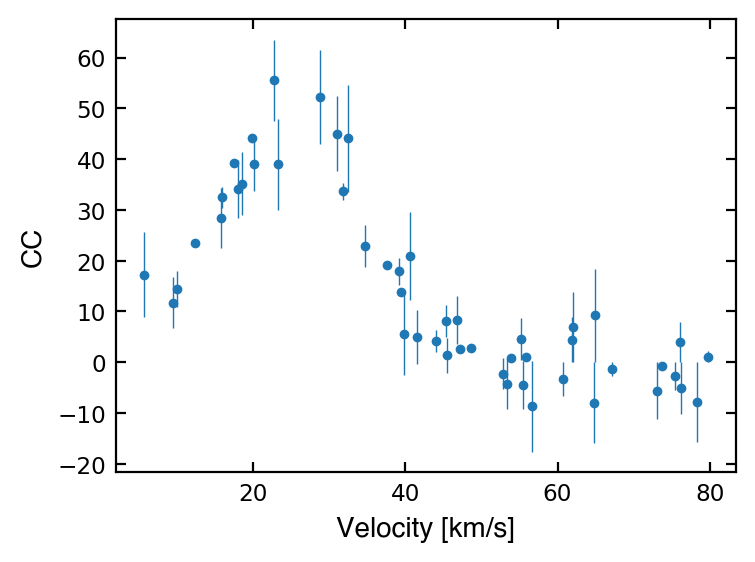

In [33]:
f = plt.figure(facecolor='white', figsize=(4,3), dpi=200 )
ax = plt.subplot(111)

ax.errorbar(velocity, cc, yerr=cc_err, fmt='.', ms=5, lw=0.5)
      
ax.tick_params(which='both', labelsize='small', right=True, top=True, direction='in')   
ax.set_xlabel('Velocity [km/s]', fontname='Helvetica')
ax.set_ylabel('CC', fontname='Helvetica')
plt.show()

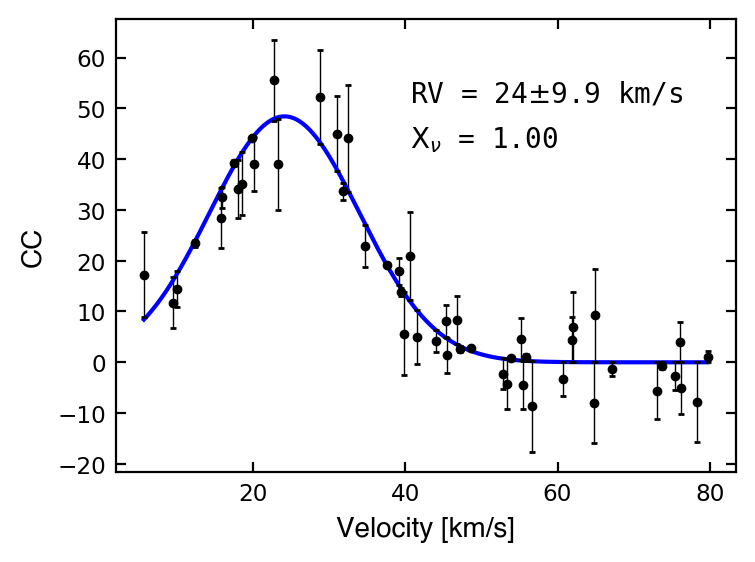

In [78]:
# 1. Define gaussian function
def getGauss(x, a, mu, sig):
    """
    Equation calculates a Gaussian function 

    Parameters 
    ------------
    x : array of floats (np.array)
        x values, on which to evaluate the Gaussian function (velocity)
    a : float
        a is a normalization constant (amplitude)
    mu : float
        mean of the Gaussian distribution
    sig : float
        standard deviation or width of the Gaussian distribution 

    Returns
    -------
    Gaussian function : array of floats (np.array)
    """

    return a*np.exp(-((x - mu)**2)/(2*sig**2))

# 2. Fit data with scipy.optimize.curve_fit()

p0 = [10, 30, 10]
popt, pcov = curve_fit(getGauss, velocity, cc, p0, sigma=cc_err, absolute_sigma=True)

# 3. Plot data with best fit model
# Compute fit errors and unpack
a_err, mu_err, sig_err = np.sqrt(np.diag(pcov))
a, mu, sig = popt  

#calculate reduced chi squared
dof = len(popt)
chi_n = chi_squared_reduced(cc, getGauss(velocity, a, mu, sig), cc_err, dof = dof)


# Make best-fitting curve to plot
x_fit = np.linspace(velocity.min(), velocity.max(), 1000)
y_fit = getGauss(x_fit, a, mu, sig)
# ---------
#Plotting

f = plt.figure(facecolor = 'white', figsize = (4,3), dpi = 200)
ax = plt.subplot(111)

ax.plot(x_fit, y_fit, color = 'blue', linestyle = 'solid')
ax.errorbar(velocity, cc, yerr=cc_err, fmt='.', ms=5, lw=0.5, capsize = 1, color = 'black')
      
ax.tick_params(which='both', labelsize='small', right=True, top=True, direction='in')   
ax.set_xlabel('Velocity [km/s]', fontname='Helvetica')
ax.set_ylabel('CC', fontname='Helvetica')

params = (a, mu, sig)
msg1 = 'RV = {:1.0f}$\pm${:1.1f} km/s'.format(*params[1:])
msg2 = '$\u03A7_\u03BD$ = {:1.2f}'.format(chi_n)
ax.text(0.5, 0.9, msg1, transform=ax1.transAxes, va='top', family='monospace')
ax.text(0.5, 0.8, msg2, transform=ax1.transAxes, va='top', family='monospace')
plt.show()